In [1]:
import os, sys

notebook_dir = os.getcwd()

#add path
sys.path.append(os.path.abspath(os.path.join(notebook_dir, '..')))

In [2]:
from scripts.load_data import *
from scripts.cleaning_and_EDA import *
from scripts.merge_datasets import *
from scripts.feature_create import *
from scripts.scaling_and_encoding import *

In [3]:
fra_data_path = '../../Data/Fraud_Data.csv'
IpAd_data_path = '../../Data/IpAddress_to_Country.csv'
cred_data_path = '../../Data/creditcard.csv/creditcard.csv'

loaded_data_fra = load_data(fra_data_path)
loaded_data_IpAd = load_data(IpAd_data_path)
loaded_data_cred = load_data(cred_data_path)

loaded_data_fra.head(5)
# loaded_data_IpAd.head(5)
# loaded_data_cred.head(5)

,user_id,signup_time,purchase_time,purchase_value,device_id,source,browser,sex,age,ip_address,class
0,22058,2015-02-24 22:55:49,2015-04-18 02:47:11,34,QVPSPJUOCKZAR,SEO,Chrome,M,39,7.327584e+08,0
1,333320,2015-06-07 20:39:50,2015-06-08 01:38:54,16,EOGFQPIZPYXFZ,Ads,Chrome,F,53,3.503114e+08,0
2,1359,2015-01-01 18:52:44,2015-01-01 18:52:45,15,YSSKYOSJHPPLJ,SEO,Opera,M,53,2.621474e+09,1
3,150084,2015-04-28 21:13:25,2015-05-04 13:54:50,44,ATGTXKYKUDUQN,SEO,Safari,M,41,3.840542e+09,0
4,221365,2015-07-21 07:09:52,2015-09-09 18:40:53,39,NAUITBZFJKHWW,Ads,Safari,M,45,4.155831e+08,0


In [4]:
print(loaded_data_fra.shape)
print(loaded_data_IpAd.shape)
print(loaded_data_cred.shape)

(151112, 11)
(138846, 3)
(284807, 31)


In [ ]:
print(loaded_data_fra.info())
print(loaded_data_IpAd.info())
print(loaded_data_cred.info())

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 138846 entries, 0 to 138845
Data columns (total 3 columns):
 #   Column                  Non-Null Count   Dtype  
---  ------                  --------------   -----  
 0   lower_bound_ip_address  138846 non-null  float64
 1   upper_bound_ip_address  138846 non-null  int64  
 2   country                 138846 non-null  object 
dtypes: float64(1), int64(1), object(1)
memory usage: 3.2+ MB
None
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 284807 entries, 0 to 284806
Data columns (total 31 columns):
 #   Column  Non-Null Count   Dtype  
---  ------  --------------   -----  
 0   Time    284807 non-null  float64
 1   V1      284807 non-null  float64
 2   V2      284807 non-null  float64
 3   V3      284807 non-null  float64
 4   V4      284807 non-null  float64
 5   V5      284807 non-null  float64
 6   V6      284807 non-null  float64
 7   V7      284807 non-null  float64
 8   V8      284807 non-null  float64
 9   V9      284807 non-

In [37]:
# Print null values to check if there's missing values
print(loaded_data_fra.isnull().sum())
print(loaded_data_IpAd.isnull().sum())
print(loaded_data_cred.isnull().sum())

user_id           0
signup_time       0
purchase_time     0
purchase_value    0
device_id         0
source            0
browser           0
sex               0
age               0
ip_address        0
class             0
dtype: int64
lower_bound_ip_address    0
upper_bound_ip_address    0
country                   0
dtype: int64
Time      0
V1        0
V2        0
V3        0
V4        0
V5        0
V6        0
V7        0
V8        0
V9        0
V10       0
V11       0
V12       0
V13       0
V14       0
V15       0
V16       0
V17       0
V18       0
V19       0
V20       0
V21       0
V22       0
V23       0
V24       0
V25       0
V26       0
V27       0
V28       0
Amount    0
Class     0
dtype: int64


In [4]:
loaded_data_fra = handle_missing_val(loaded_data_fra, strategy='impute', fill_value=0)
loaded_data_IpAd = handle_missing_val(loaded_data_IpAd)
loaded_data_cred = handle_missing_val(loaded_data_cred)

In [5]:
# Finding duplicates
print(loaded_data_fra.duplicated().sum())
print(loaded_data_IpAd.duplicated().sum())
print(loaded_data_cred.duplicated().sum())

0
0
1081


In [5]:
loaded_data_fra = data_cleaning(loaded_data_fra)
loaded_data_IpAd = data_cleaning(loaded_data_IpAd)
loaded_data_cred = data_cleaning(loaded_data_cred)

In [6]:
# This one had 1081 duplicates, now they are handled
print(loaded_data_cred.duplicated().sum())

0


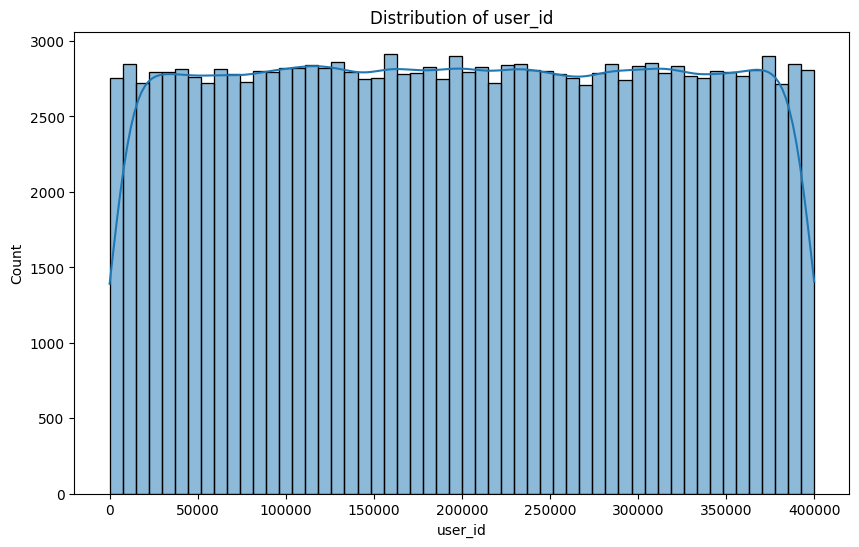

In [6]:
univariate(loaded_data_fra, 'user_id')

In [6]:
# Merge datasets for geolocation analysis
merged_data = merge_geolocation_data(loaded_data_fra, loaded_data_IpAd)
merged_data

,user_id,signup_time,purchase_time,purchase_value,device_id,source,browser,sex,age,ip_address,class,ip_int,lower_bound_ip_address,upper_bound_ip_address,country,lower_bound_int,upper_bound_int
0,328163,2015-07-05 17:00:16,2015-09-06 21:20:27,20,HEYPEUGXZEKNX,SEO,Safari,M,36,9.820870e+06,0,10056571448,3.905946e+07,39321599,Greece,9999220736,39321599
1,333654,2015-06-08 16:57:44,2015-08-30 02:41:50,20,GNQIVPPHAJRFS,Direct,FireFox,F,37,6.537422e+07,0,16735801527,5.033165e+07,67108863,United States,12884901888,67108863
2,166512,2015-05-09 02:05:50,2015-08-25 10:38:34,23,VOGAPYOZKNQTA,Ads,Chrome,M,34,1.037645e+08,0,26563699790,1.006633e+08,117440511,United States,25769803776,117440511
3,740,2015-03-15 08:20:08,2015-04-01 14:50:17,66,UEDAZMASSYOSX,SEO,Opera,M,22,1.043987e+08,0,26726079750,1.006633e+08,117440511,United States,25769803776,117440511
4,180723,2015-06-05 18:24:19,2015-09-20 06:36:36,33,LWDSLJZDLAQKU,Direct,Chrome,M,34,1.277837e+08,0,32712616263,1.174405e+08,134217727,United States,30064771072,134217727
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
151107,51008,2015-04-19 07:43:59,2015-07-27 03:41:48,31,NTNGPTKMZBITC,SEO,Opera,M,18,9.933296e+07,0,1666530567785453,3.758096e+09,3758096383,Australia,962072608768,3758096383
151108,389303,2015-04-16 02:19:52,2015-07-19 11:54:05,30,QFHNSJHIVKQEG,Ads,Chrome,M,21,9.933342e+07,0,1666538218759760,3.758096e+09,3758096383,Australia,962072608768,3758096383
151109,55070,2015-03-25 07:39:34,2015-07-13 07:51:06,33,RAEULLSFSMLGU,Ads,IE,F,39,9.956961e+07,0,1670500829831023,3.758096e+09,3758096383,Australia,962072608768,3758096383
151110,386409,2015-02-21 20:12:09,2015-05-31 09:33:34,31,OHIKTLRLIHTXM,Ads,Chrome,M,49,9.963237e+07,0,1671553717523309,3.758096e+09,3758096383,Australia,962072608768,3758096383


In [12]:
print(merged_data.isnull().sum())

user_id                   0
signup_time               0
purchase_time             0
purchase_value            0
device_id                 0
source                    0
browser                   0
sex                       0
age                       0
ip_address                0
class                     0
ip_int                    0
lower_bound_ip_address    0
upper_bound_ip_address    0
country                   0
lower_bound_int           0
upper_bound_int           0
dtype: int64


In [7]:
# Create new features
merged_data = create_features(merged_data)
merged_data

,user_id,signup_time,purchase_time,purchase_value,device_id,source,browser,sex,age,ip_address,...,ip_int,lower_bound_ip_address,upper_bound_ip_address,country,lower_bound_int,upper_bound_int,hour_of_day,day_of_week,transaction_frequency,time_since_last_transaction
0,328163,2015-07-05 17:00:16,2015-09-06 21:20:27,20,HEYPEUGXZEKNX,SEO,Safari,M,36,9.820870e+06,...,10056571448,3.905946e+07,39321599,Greece,9999220736,39321599,21,6,1,NaN
1,333654,2015-06-08 16:57:44,2015-08-30 02:41:50,20,GNQIVPPHAJRFS,Direct,FireFox,F,37,6.537422e+07,...,16735801527,5.033165e+07,67108863,United States,12884901888,67108863,2,6,1,NaN
2,166512,2015-05-09 02:05:50,2015-08-25 10:38:34,23,VOGAPYOZKNQTA,Ads,Chrome,M,34,1.037645e+08,...,26563699790,1.006633e+08,117440511,United States,25769803776,117440511,10,1,1,NaN
3,740,2015-03-15 08:20:08,2015-04-01 14:50:17,66,UEDAZMASSYOSX,SEO,Opera,M,22,1.043987e+08,...,26726079750,1.006633e+08,117440511,United States,25769803776,117440511,14,2,1,NaN
4,180723,2015-06-05 18:24:19,2015-09-20 06:36:36,33,LWDSLJZDLAQKU,Direct,Chrome,M,34,1.277837e+08,...,32712616263,1.174405e+08,134217727,United States,30064771072,134217727,6,6,1,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
151107,51008,2015-04-19 07:43:59,2015-07-27 03:41:48,31,NTNGPTKMZBITC,SEO,Opera,M,18,9.933296e+07,...,1666530567785453,3.758096e+09,3758096383,Australia,962072608768,3758096383,3,0,1,NaN
151108,389303,2015-04-16 02:19:52,2015-07-19 11:54:05,30,QFHNSJHIVKQEG,Ads,Chrome,M,21,9.933342e+07,...,1666538218759760,3.758096e+09,3758096383,Australia,962072608768,3758096383,11,6,1,NaN
151109,55070,2015-03-25 07:39:34,2015-07-13 07:51:06,33,RAEULLSFSMLGU,Ads,IE,F,39,9.956961e+07,...,1670500829831023,3.758096e+09,3758096383,Australia,962072608768,3758096383,7,0,1,NaN
151110,386409,2015-02-21 20:12:09,2015-05-31 09:33:34,31,OHIKTLRLIHTXM,Ads,Chrome,M,49,9.963237e+07,...,1671553717523309,3.758096e+09,3758096383,Australia,962072608768,3758096383,9,6,1,NaN


In [18]:
merged_data['purchase_time'].dtype

Index(['user_id', 'signup_time', 'purchase_time', 'purchase_value',
       'device_id', 'source', 'browser', 'sex', 'age', 'ip_address', 'class',
       'ip_int', 'lower_bound_ip_address', 'upper_bound_ip_address', 'country',
       'lower_bound_int', 'upper_bound_int', 'hour_of_day', 'day_of_week',
       'transaction_frequency', 'time_since_last_transaction'],
      dtype='object')

In [15]:
# Normalize numerical features
numerical_columns = ['purchase_value', 'age', 'transaction_frequency', 'time_since_last_transaction']
normalized_data = normalize_data(merged_data, numerical_columns)

c:\Users\pc\Desktop\10_Academy\Week-8&9\kaim-week-8_and_9\.myvenv8\lib\site-packages\sklearn\utils\extmath.py:1101: RuntimeWarning: invalid value encountered in divide
  updated_mean = (last_sum + new_sum) / updated_sample_count
c:\Users\pc\Desktop\10_Academy\Week-8&9\kaim-week-8_and_9\.myvenv8\lib\site-packages\sklearn\utils\extmath.py:1106: RuntimeWarning: invalid value encountered in divide
  T = new_sum / new_sample_count
c:\Users\pc\Desktop\10_Academy\Week-8&9\kaim-week-8_and_9\.myvenv8\lib\site-packages\sklearn\utils\extmath.py:1126: RuntimeWarning: invalid value encountered in divide
  new_unnormalized_variance -= correction**2 / new_sample_count


In [ ]:
# Encode categorical features
categorical_columns = ['source', 'browser', 'sex']
encoded_data = encode_categorical_features(normalized_data, categorical_columns)

In [ ]:
# Perform EDA
univariate(merged_data, 'purchase_value')
bivariate(merged_data, 'purchase_value', 'age')